# Session 1: HPC and the Julia Framework

**OBJECTIVE**: Confirm Julia framework and Base speed
- [ ] KR1: Use `@code_*` to examine a simple function. The `*` is replaceable by `native`, `typed`, `warntype`, and others. Discover them.
- [ ] KR2: Demonstrate that Julia is able to determine constants in codes.
- [ ] KR3: Demonstrate Julia's type-inference and multiple dispatch.
- [ ] KR3: Show the difference, if any, between your own sum function `my_sum(x::Vector)` and `@time`. Use a `for`-loop for your *customized* sum function.
- [ ] KR4: Replicate plotting the Mandelbrot. Use a separate file `Mandelbrot.jl` to contain the function code. Use `include()` function to load the file.
- [ ] KR5: Plot of the time it takes for the function to run using `@time` macro for the given grid size `n`.
- [ ] KR6: Disuss the computational complexity of the Madelbrot function you made based onKR5. What is the best `@time` output to use for this?

In [1]:
using Pkg
Pkg.activate(".") #activating the local Package environment, for this Session

##adding packages used in this Session

  Activating project at `~/Documents/GitHub/Phys215-202223-1/01-HPC`


## KR1
Use `@code_*` to examine a simple function. The `*` is replaceable by `native`, `typed`, `warntype`, and others. Discover them.

In [2]:
@code_warntype 3^2

MethodInstance for ^(::Int64, ::Int64)
  from ^(x::T, p::T) where T<:Integer in Base at intfuncs.jl:299
Static Parameters
  T = Int64
Arguments
  #self#::Core.Const(^)
  x::Int64
  p::Int64
Body::Int64
1 ─ %1 = Base.power_by_squaring(x, p)::Int64
└──      return %1



In [3]:
@code_warntype 3.0^(2.0)

MethodInstance for ^(::Float64, ::Float64)
  from ^(x::Float64, y::Float64) in Base.Math at math.jl:998
Arguments
  #self#::Core.Const(^)
  x::Float64
  y::Float64
Locals
  yint::Int64
Body::Float64
1 ──       nothing
│          (yint = Base.Math.unsafe_trunc(Base.Math.Int, y))
│    %3  = (y == yint)::Bool
└───       goto #3 if not %3
2 ── %5  = (x ^ yint)::Float64
└───       return %5
3 ── %7  = Base.Math.eps()::Core.Const(2.220446049250313e-16)
│    %8  = Base.Math.inv(%7)::Core.Const(4.503599627370496e15)
│    %9  = (2 * %8)::Core.Const(9.007199254740992e15)
│    %10 = (y >= %9)::Bool
└───       goto #5 if not %10
4 ── %12 = Base.Math.typemax(Base.Math.Int64)::Core.Const(9223372036854775807)
│    %13 = (%12 - 1)::Core.Const(9223372036854775806)
│    %14 = (x ^ %13)::Float64
└───       return %14
5 ── %16 = (x < 0)::Bool
└───       goto #9 if not %16
6 ── %18 = (y > -4.0e18)::Bool
└───       goto #8 if not %18
7 ──       Base.Math.throw_exp_domainerror(x)
└───       Core.Const(:(goto

In [4]:
function pos(x)
    if x < 0
        return 0
    end
    return x
end

pos (generic function with 1 method)

In [5]:
@show pos(3.2)
@show typeof(pos(3.2));

pos(3.2) = 3.2
typeof(pos(3.2)) = Float64


In [6]:
@show pos(-3.2)
@show typeof(pos(-3.2));

pos(-3.2) = 0
typeof(pos(-3.2)) = Int64


In [7]:
@code_warntype pos(3)

MethodInstance for pos(::Int64)
  from pos(x) in Main at In[4]:1
Arguments
  #self#::Core.Const(pos)
  x::Int64
Body::Int64
1 ─ %1 = (x < 0)::Bool
└──      goto #3 if not %1
2 ─      return 0
3 ─      return x



In [8]:
@code_warntype pos(-π)

MethodInstance for pos(::Float64)
  from pos(x) in Main at In[4]:1
Arguments
  #self#::Core.Const(pos)
  x::Float64
Body::Union{Float64, Int64}
1 ─ %1 = (x < 0)::Bool
└──      goto #3 if not %1
2 ─      return 0
3 ─      return x



## Fixing the issue

Use `typeof()` or `eltype()` to ensure adaptive type.

In [9]:
function posFixed(x)
    if x < 0
        return zero(typeof(x))
    end
    return x
end

posFixed (generic function with 1 method)

In [10]:
@code_warntype posFixed(-π)

MethodInstance for posFixed(::Float64)
  from posFixed(x) in Main at In[9]:1
Arguments
  #self#::Core.Const(posFixed)
  x::Float64
Body::Float64
1 ─ %1 = (x < 0)::Bool
└──      goto #3 if not %1
2 ─ %3 = Main.typeof(x)::Core.Const(Float64)
│   %4 = Main.zero(%3)::Core.Const(0.0)
└──      return %4
3 ─      return x



In [11]:
@code_warntype posFixed(-3)

MethodInstance for posFixed(::Int64)
  from posFixed(x) in Main at In[9]:1
Arguments
  #self#::Core.Const(posFixed)
  x::Int64
Body::Int64
1 ─ %1 = (x < 0)::Bool
└──      goto #3 if not %1
2 ─ %3 = Main.typeof(x)::Core.Const(Int64)
│   %4 = Main.zero(%3)::Core.Const(0)
└──      return %4
3 ─      return x



### So far..
- [x] KR1: Use `@code_*` to examine a simple function. The `*` is replaceable by `native`, `typed`, `warntype`, and others. Discover them.
- [ ] KR2: Demonstrate that Julia is able to determine constants in codes.
- [ ] KR3: Demonstrate Julia's type-inference and multiple dispatch.
- [ ] KR3: Show the difference, if any, between your own sum function `my_sum(x::Vector)` and `@time`. Use a `for`-loop for your *customized* sum function.
- [ ] KR4: Replicate plotting the Mandelbrot. Use a separate file `Mandelbrot.jl` to contain the function code. Use `include()` function to load the file.
- [ ] KR5: Plot of the time it takes for the function to run using `@time` macro.
- [ ] KR6: Disuss the computational complexity of the Madelbrot function you made based onKR5. What is the best `@time` output to use for this?

## KR2
Demonstrate that Julia is able to determine constants in codes.

In [12]:
@inline f(x) = log(10.0)*x

f (generic function with 1 method)

In [13]:
log(10.0)

2.302585092994046

In [14]:
@code_llvm f(4.0)

;  @ In[12]:1 within `f`
define double @julia_f_2066(double %0) #0 {
top:
; ┌ @ float.jl:385 within `*`
   %1 = fmul double %0, 0x40026BB1BBB55516
; └
  ret double %1
}


In [15]:
@code_typed f(4.0)

CodeInfo(
1 ─ %1 = Base.mul_float(2.302585092994046, x)::Float64
└──      return %1
) => Float64

In [16]:
f₁(x) = x*log(x)*f(x)

f₁ (generic function with 1 method)

In [17]:
@code_llvm f₁(4.0)

;  @ In[16]:1 within `f₁`
define double @"julia_f\E2\82\81_2411"(double %0) #0 {
top:
; ┌ @ special/log.jl:267 within `log`
   %1 = call double @j__log_2413(double %0, {}* inttoptr (i64 4311562304 to {}*)) #0
; └
; ┌ @ In[12]:1 within `f`
; │┌ @ float.jl:385 within `*`
    %2 = fmul double %0, 0x40026BB1BBB55516
; └└
; ┌ @ operators.jl:591 within `*` @ float.jl:385
   %3 = fmul double %1, %0
   %4 = fmul double %2, %3
; └
  ret double %4
}


In [18]:
@code_native f₁(4.0)

	.section	__TEXT,__text,regular,pure_instructions
	.build_version macos, 12, 0
	.section	__TEXT,__literal8,8byte_literals
	.p2align	3                               ## -- Begin function julia_f₁_2428
LCPI0_0:
	.quad	0x40026bb1bbb55516              ## double 2.3025850929940459
	.section	__TEXT,__text,regular,pure_instructions
	.globl	"_julia_f₁_2428"
	.p2align	4, 0x90
"_julia_f₁_2428":                       ## @"julia_f\E2\82\81_2428"
; ┌ @ In[16]:1 within `f₁`
	.cfi_startproc
## %bb.0:                               ## %top
	subq	$8, %rsp
	.cfi_def_cfa_offset 16
	vmovsd	%xmm0, (%rsp)                   ## 8-byte Spill
; │┌ @ special/log.jl:267 within `log`
	movabsq	$_j__log_2430, %rax
	movabsq	$4311562304, %rdi               ## imm = 0x100FD3840
	callq	*%rax
	movabsq	$LCPI0_0, %rax
	vmovsd	(%rsp), %xmm2                   ## 8-byte Reload
                                        ## xmm2 = mem[0],zero
; │└
; │┌ @ In[12]:1 within `f`
; ││┌ @ float.jl:385 within `*`
	vmulsd	(%rax), %xmm2, %xmm

In [19]:
@code_typed f₁(4.0)

CodeInfo(
1 ─ %1 = invoke Base.Math._log(x::Float64, $(QuoteNode(Val{:ℯ}()))::Val{:ℯ}, :log::Symbol)::Float64
│   %2 = Base.mul_float(2.302585092994046, x)::Float64
│   %3 = Base.mul_float(x, %1)::Float64
│   %4 = Base.mul_float(%3, %2)::Float64
└──      return %4
) => Float64

### So far..
- [x] KR1: Use `@code_*` to examine a simple function. The `*` is replaceable by `native`, `typed`, `warntype`, and others. Discover them.
- [x] KR2: Demonstrate that Julia is able to determine constants in codes.
- [ ] KR3: Demonstrate Julia's type-inference and multiple dispatch.
- [ ] KR3: Show the difference, if any, between your own sum function `my_sum(x::Vector)` and `@time`. Use a `for`-loop for your *customized* sum function.
- [ ] KR4: Replicate plotting the Mandelbrot. Use a separate file `Mandelbrot.jl` to contain the function code. Use `include()` function to load the file.
- [ ] KR5: Plot of the time it takes for the function to run using `@time` macro.
- [ ] KR6: Disuss the computational complexity of the Madelbrot function you made based onKR5. What is the best `@time` output to use for this?

# KR3
Demonstrate Julia's type-inference and multiple dispatch.

### Avoid overloading existing functions
Always check if the intended function is pre-existing in the loaded environment.
The system can recognize it once the cell is run below.

In [20]:
?what

search: Cwchar_t

Couldn't find what
Perhaps you meant wait, cat, hcat, stat, vcat, Char, which, where or while


No documentation found.

Binding `what` does not exist.


In [21]:
what(x) = "(generic) some type $(typeof(x))" #most general case
what(x::String) = "a string"
what(x::Number) = "a number"
what(x::Real) = "a real number"
what(x::Rational) = "a rational number"
what(x::Int) = "an integer"
what(x::Complex) = "a complex number"

what (generic function with 7 methods)

Notice the difference between a Julia function `what()` and a Julia method (how the function behaves).

The function `what()` now exists in the environment.

In [22]:
?what

search: what Cwchar_t



No documentation found.

`what` is a `Function`.

```
# 7 methods for generic function "what":
[1] what(x::Rational) in Main at In[21]:5
[2] what(x::Complex) in Main at In[21]:7
[3] what(x::String) in Main at In[21]:2
[4] what(x::Int64) in Main at In[21]:6
[5] what(x::Real) in Main at In[21]:4
[6] what(x::Number) in Main at In[21]:3
[7] what(x) in Main at In[21]:1
```


In [23]:
println("π is $(what(π)).")
println("4.0 is $(what(4.0)).")
println("4 is $(what(4)).")
println("\"x\" is $(what("x")).")
println("\'x\' is $(what('x')).")
println("4+2im is $(what(4+2im)).")

π is a real number.
4.0 is a real number.
4 is an integer.
"x" is a string.
'x' is (generic) some type Char.
4+2im is a complex number.


### So far..
- [x] KR1: Use `@code_*` to examine a simple function. The `*` is replaceable by `native`, `typed`, `warntype`, and others. Discover them.
- [x] KR2: Demonstrate that Julia is able to determine constants in codes.
- [x] KR3: Demonstrate Julia's type-inference and multiple dispatch.
- [ ] KR3: Show the difference, if any, between your own sum function `my_sum(x::Vector)` and `@time`. Use a `for`-loop for your *customized* sum function.
- [ ] KR4: Replicate plotting the Mandelbrot. Use a separate file `Mandelbrot.jl` to contain the function code. Use `include()` function to load the file.
- [ ] KR5: Plot of the time it takes for the function to run using `@time` macro.
- [ ] KR6: Disuss the computational complexity of the Madelbrot function you made based onKR5. What is the best `@time` output to use for this?

## KR3
Show the difference, if any, between your own sum function `my_sum(x::Vector)` and `@time`. Use a `for`-loop for your *customized* sum function.

In [25]:
function my_sum(x::Vector)
    s = zero(eltype(x)) ##important to use consistent zero type, eltype()=?
    for i in 1:length(x)
        s += x[i]
    end
    return s
end

my_sum (generic function with 1 method)

### Use `@time` macro

Let's check the time it takes to run `my_sum()`.

We will use the following fixed values.

In [26]:
x = rand(10_000_000);

Notice the semicolon.

In [27]:
@time my_sum(x)

  0.022384 seconds (13.17 k allocations: 736.162 KiB, 31.90% compilation time)


5.000274518355746e6

Notice the compilation time appearing on the first time the function is used.

In [28]:
@time my_sum(x)

  0.024739 seconds (1 allocation: 16 bytes)


5.000274518355746e6

**Using `Base.sum()`**

In [29]:
?sum

search: sum sum! summary cumsum my_sum cumsum! isnumeric VersionNumber



```
sum(f, itr; [init])
```

Sum the results of calling function `f` on each element of `itr`.

The return type is `Int` for signed integers of less than system word size, and `UInt` for unsigned integers of less than system word size.  For all other arguments, a common return type is found to which all arguments are promoted.

The value returned for empty `itr` can be specified by `init`. It must be the additive identity (i.e. zero) as it is unspecified whether `init` is used for non-empty collections.

!!! compat "Julia 1.6"
    Keyword argument `init` requires Julia 1.6 or later.


# Examples

```jldoctest
julia> sum(abs2, [2; 3; 4])
29
```

Note the important difference between `sum(A)` and `reduce(+, A)` for arrays with small integer eltype:

```jldoctest
julia> sum(Int8[100, 28])
128

julia> reduce(+, Int8[100, 28])
-128
```

In the former case, the integers are widened to system word size and therefore the result is 128. In the latter case, no such widening happens and integer overflow results in -128.

---

```
sum(itr; [init])
```

Returns the sum of all elements in a collection.

The return type is `Int` for signed integers of less than system word size, and `UInt` for unsigned integers of less than system word size.  For all other arguments, a common return type is found to which all arguments are promoted.

The value returned for empty `itr` can be specified by `init`. It must be the additive identity (i.e. zero) as it is unspecified whether `init` is used for non-empty collections.

!!! compat "Julia 1.6"
    Keyword argument `init` requires Julia 1.6 or later.


See also: [`reduce`](@ref), [`mapreduce`](@ref), [`count`](@ref), [`union`](@ref).

# Examples

```jldoctest
julia> sum(1:20)
210

julia> sum(1:20; init = 0.0)
210.0
```

---

```
sum(A::AbstractArray; dims)
```

Sum elements of an array over the given dimensions.

# Examples

```jldoctest
julia> A = [1 2; 3 4]
2×2 Matrix{Int64}:
 1  2
 3  4

julia> sum(A, dims=1)
1×2 Matrix{Int64}:
 4  6

julia> sum(A, dims=2)
2×1 Matrix{Int64}:
 3
 7
```

---

```
sum(f, A::AbstractArray; dims)
```

Sum the results of calling function `f` on each element of an array over the given dimensions.

# Examples

```jldoctest
julia> A = [1 2; 3 4]
2×2 Matrix{Int64}:
 1  2
 3  4

julia> sum(abs2, A, dims=1)
1×2 Matrix{Int64}:
 10  20

julia> sum(abs2, A, dims=2)
2×1 Matrix{Int64}:
  5
 25
```


### Specific form of `sum()`

In [30]:
?sum(::Array)

```
sum(itr; [init])
```

Returns the sum of all elements in a collection.

The return type is `Int` for signed integers of less than system word size, and `UInt` for unsigned integers of less than system word size.  For all other arguments, a common return type is found to which all arguments are promoted.

The value returned for empty `itr` can be specified by `init`. It must be the additive identity (i.e. zero) as it is unspecified whether `init` is used for non-empty collections.

!!! compat "Julia 1.6"
    Keyword argument `init` requires Julia 1.6 or later.


See also: [`reduce`](@ref), [`mapreduce`](@ref), [`count`](@ref), [`union`](@ref).

# Examples

```jldoctest
julia> sum(1:20)
210

julia> sum(1:20; init = 0.0)
210.0
```

---

```
sum(A::AbstractArray; dims)
```

Sum elements of an array over the given dimensions.

# Examples

```jldoctest
julia> A = [1 2; 3 4]
2×2 Matrix{Int64}:
 1  2
 3  4

julia> sum(A, dims=1)
1×2 Matrix{Int64}:
 4  6

julia> sum(A, dims=2)
2×1 Matrix{Int64}:
 3
 7
```


In [31]:
@time sum(x) #using the Base.sum(::Vector) function

  0.091582 seconds (277.59 k allocations: 15.225 MiB, 92.80% compilation time)


5.0002745183566585e6

In [32]:
@time sum(x) #using the Base.sum(::Vector) function

  0.006136 seconds (1 allocation: 16 bytes)


5.0002745183566585e6

If we compare `my_sum()` and `Base.sum()`...

In [44]:
tmy = @elapsed my_sum(x)

0.022819789

In [45]:
tbs = @elapsed sum(x)

0.006188342

In [48]:
@show tmy/tbs;

tmy / tbs = 3.687544902980475


### So far..
- [x] KR1: Use `@code_*` to examine a simple function. The `*` is replaceable by `native`, `typed`, `warntype`, and others. Discover them.
- [x] KR2: Demonstrate that Julia is able to determine constants in codes.
- [x] KR3: Demonstrate Julia's type-inference and multiple dispatch.
- [x] KR3: Show the difference, if any, between your own sum function `my_sum(x::Vector)` and `@time`. Use a `for`-loop for your *customized* sum function.
- [ ] KR4: Replicate plotting the Mandelbrot. Use a separate file `Mandelbrot.jl` to contain the function code. Use `include()` function to load the file.
- [ ] KR5: Plot of the time it takes for the function to run using `@time` macro.
- [ ] KR6: Disuss the computational complexity of the Madelbrot function you made based onKR5. What is the best `@time` output to use for this?

## Quick Note: Avoid global variables in Julia 😱

The **use of global variables [is highly discouraged in Julia](https://docs.julialang.org/en/v1/manual/performance-tips/#Avoid-global-variables)**.
It interferes with the type inferencing system `LLVM-IR` within its system.

BTW: Unicodes in Julia is available [here](https://docs.julialang.org/en/v1/manual/unicode-input/).

## KR4
Replicate plotting the Mandelbrot. Use a separate file `Mandelbrot.jl` to contain the function code. Use `include()` function to load the file.

In [49]:
include("Mandelbrot.jl")

mandelbrot

In [50]:
?mandelbrot

search: mandelbrot



```
mandelbrot( c )
```

Computes the number of evaluations of the following equation before the resulting complex number `z` beginning with `z=c`.

  * Input: `c::Number`
  * Output: `itrMax::??`

### Questions

  * What do you think is the output type of this function?
  * Which of the part of the code determines the type?

Sometimes forcing the type of output can be an advantage.


Loading the plotting function in `PlotMandelbrot.jl`..

In [51]:
include("PlotMandelbrot.jl")

plotMandelbrot (generic function with 2 methods)

In [52]:
?plotMandelbrot

search: plotMandelbrot



```
plotMandel( xrange::Tuple{Float64,Float64}, yrange::Tuple{Float64,Float64}; n=100 )
```

Plots the results of `mandelbrot()` function using the `heatmap()` function.

  * Must load `Plots` module.

**Special case**

```
plotMandelbrot( vrange::Tuple{Float64,Float64}; n=100 ) = plotMandelbrot( vrange, vrange; n )
```


The plot code can also be part of the `Mandelbrot.jl` code file.

In [53]:
## must load Plots module..
using Plots

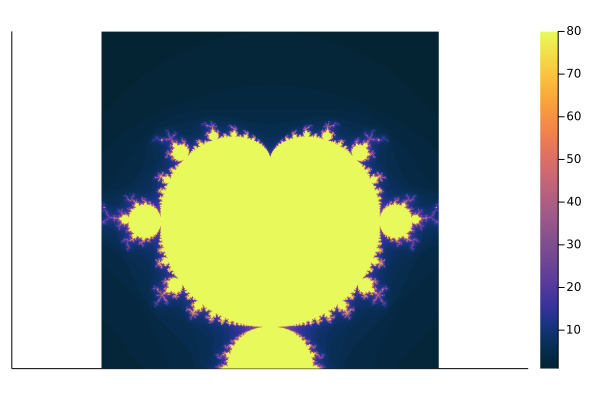

In [54]:
plotMandelbrot( (-1.0,1.0); n=1_000 )

### Zooming in interesting areas

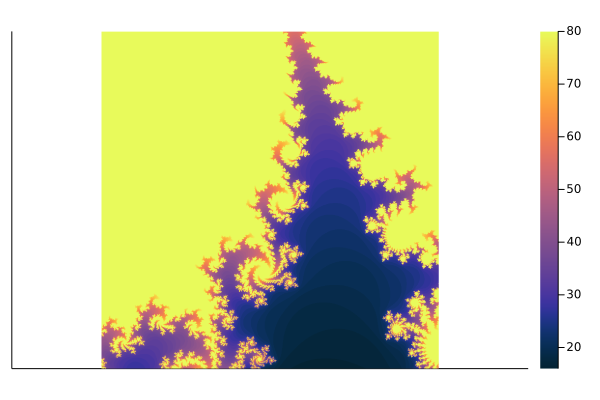

In [55]:
plotMandelbrot( (-0.55,-0.5); n=1_000 )

### So far..
- [x] KR1: Use `@code_*` to examine a simple function. The `*` is replaceable by `native`, `typed`, `warntype`, and others. Discover them.
- [x] KR2: Demonstrate that Julia is able to determine constants in codes.
- [x] KR3: Demonstrate Julia's type-inference and multiple dispatch.
- [x] KR3: Show the difference, if any, between your own sum function `my_sum(x::Vector)` and `@time`. Use a `for`-loop for your *customized* sum function.
- [x] KR4: Replicate plotting the Mandelbrot. Use a separate file `Mandelbrot.jl` to contain the function code. Use `include()` function to load the file.
- [ ] KR5: Plot of the time it takes for the function to run using `@time` macro for the given grid size `n`.
- [ ] KR6: Disuss the computational complexity of the Madelbrot function you made based onKR5. What is the best `@time` output to use for this?

# Fin.
[Back](https://jybantang.github.io/Phys215-202122-1/01-HPC/)